<a href="https://colab.research.google.com/github/AnaghaNithin/DSA-PythonCaseStudy/blob/main/Case_Study_On_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load the dataset
data=pd.read_csv('/content/car_age_price.csv')

In [37]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [39]:
data.isnull().sum()

,0
Year,0
Price,0


In [40]:
# Find the best linear relationship between year and price.

from sklearn.linear_model import LinearRegression

In [41]:
# Reshape the data for modeling
X = data[['Year']].values
y = data['Price'].values

In [42]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [43]:
# Predict prices based on the model
y_pred = model.predict(X)


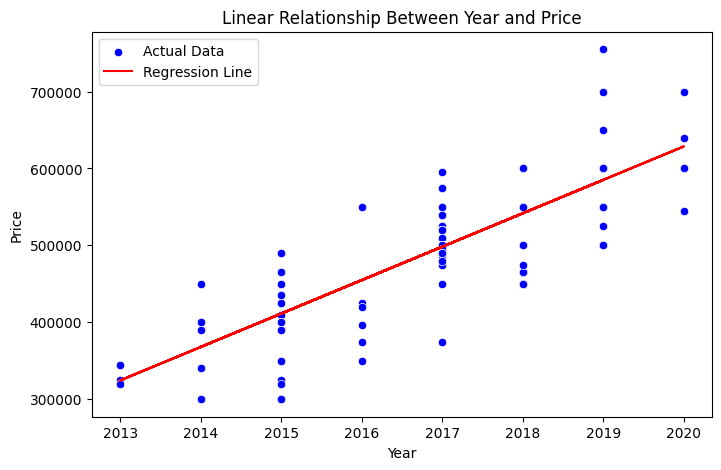

In [44]:
# Plot the data and regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Year"], y=data["Price"], label="Actual Data", color="blue")
plt.plot(data["Year"], y_pred, color="red", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Linear Relationship Between Year and Price")
plt.legend()
plt.show()

In [45]:
# Can you predict the possible price of a 2022 model second-hand grand i10?
predicted_price = model.predict(np.array([[2022]]))
print(f"Predicted Price for 2022 model: {predicted_price[0]:,.2f}")

Predicted Price for 2022 model: 715,488.08


In [46]:
# Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [47]:
# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)


In [48]:
# Train Lasso Regression
lasso_model = Lasso(alpha=1000)  # Adjust alpha for better tuning
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X)

In [49]:
# Evaluate models
mse_linear = mean_squared_error(y, y_pred_linear)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_linear = r2_score(y, y_pred_linear)
r2_lasso = r2_score(y, y_pred_lasso)

In [50]:
print(f"Linear Regression - MSE: {mse_linear:.2f}, R²: {r2_linear:.2f}")
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f}")


Linear Regression - MSE: 3276721166.56, R²: 0.60
Lasso Regression - MSE: 3277101115.07, R²: 0.60


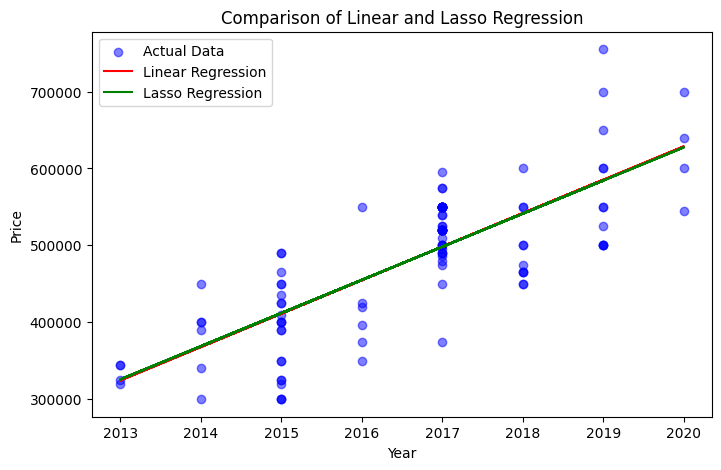

In [51]:
plt.figure(figsize=(8, 5))
plt.scatter(data["Year"], data["Price"], label="Actual Data", color="blue", alpha=0.5)
plt.plot(data["Year"], y_pred_linear, color="red", label="Linear Regression")
plt.plot(data["Year"], y_pred_lasso, color="green", label="Lasso Regression")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Comparison of Linear and Lasso Regression")
plt.legend()
plt.show()